In [2]:
#   Work Experience Machine Learning Prediction Tool.
#   Tries to predict whether or not a specific person will or will not have work experience based on their gender, degree, 
#   grades 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
#Reads the data

placement_data = pd.read_csv('Placement_Data_Full_Class.csv')


In [4]:
#Drops unneeded values and fills any NA's in salary as 0.

cleaned_data = placement_data.drop(['sl_no','ssc_b', 'hsc_b', 'specialisation'], axis=1)
cleaned_data['salary'].fillna(value=0, inplace=True)

In [5]:
cleaned_data.head(20)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.00,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.50,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.00,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.00,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.80,55.50,Placed,425000.0
5,M,55.00,49.80,Science,67.25,Sci&Tech,Yes,55.00,51.58,Not Placed,0.0
6,F,46.00,49.20,Commerce,79.00,Comm&Mgmt,No,74.28,53.29,Not Placed,0.0
7,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.00,62.14,Placed,252000.0
8,M,73.00,79.00,Commerce,72.00,Comm&Mgmt,No,91.34,61.29,Placed,231000.0
9,M,58.00,70.00,Commerce,61.00,Comm&Mgmt,No,54.00,52.21,Not Placed,0.0


In [6]:
#Encodes our data to give us our categorical dummies as zeroes and ones. 

dummy = pd.get_dummies(cleaned_data, columns=['gender', 'workex', 'status', 'hsc_s', 'degree_t'], drop_first=True)


In [7]:
dummy.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,workex_Yes,status_Placed,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,1,1,1,0,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,1,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,0.0,1,0,0,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,1,1,0,0,0


In [8]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ssc_p              215 non-null    float64
 1   hsc_p              215 non-null    float64
 2   degree_p           215 non-null    float64
 3   etest_p            215 non-null    float64
 4   mba_p              215 non-null    float64
 5   salary             215 non-null    float64
 6   gender_M           215 non-null    uint8  
 7   workex_Yes         215 non-null    uint8  
 8   status_Placed      215 non-null    uint8  
 9   hsc_s_Commerce     215 non-null    uint8  
 10  hsc_s_Science      215 non-null    uint8  
 11  degree_t_Others    215 non-null    uint8  
 12  degree_t_Sci&Tech  215 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 11.7 KB


In [9]:
print(dummy.isnull().sum())  

#Looks clean and ready to visualize!

ssc_p                0
hsc_p                0
degree_p             0
etest_p              0
mba_p                0
salary               0
gender_M             0
workex_Yes           0
status_Placed        0
hsc_s_Commerce       0
hsc_s_Science        0
degree_t_Others      0
degree_t_Sci&Tech    0
dtype: int64


In [10]:
print(dummy.describe())

            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

              salary    gender_M  workex_Yes  status_Placed  hsc_s_Commerce  \
count     215.000000  215.000000  215.000000     215.000000      215.000000   
mean   198702.325581    0.646512    0.344186       0.688372        0.525581   
std    154780.926716    0.479168    0.476211       0.464240        0.500510   
min         0.000000    0.000000    0.000000       0.000000   

In [11]:
#   So 64% of our data is males vs. females. 34% had prior work experience before they were offered a job.
#   68% were placed in a job by the end. Right now all we want to do is attempt to predict whether or not someone gets a job.
#   The next step is to then predict their salary based on their previous experience.

In [12]:
#Ensure that our dummy variables work. I printed out 15 and checked them against the csv to ensure they worked.
dummy.head(15)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,workex_Yes,status_Placed,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,67.00,91.00,58.00,55.00,58.80,270000.0,1,0,1,1,0,0,1
1,79.33,78.33,77.48,86.50,66.28,200000.0,1,1,1,0,1,0,1
2,65.00,68.00,64.00,75.00,57.80,250000.0,1,0,1,0,0,0,0
3,56.00,52.00,52.00,66.00,59.43,0.0,1,0,0,0,1,0,1
4,85.80,73.60,73.30,96.80,55.50,425000.0,1,0,1,1,0,0,0
5,55.00,49.80,67.25,55.00,51.58,0.0,1,1,0,0,1,0,1
6,46.00,49.20,79.00,74.28,53.29,0.0,0,0,0,1,0,0,0
7,82.00,64.00,66.00,67.00,62.14,252000.0,1,1,1,0,1,0,1
8,73.00,79.00,72.00,91.34,61.29,231000.0,1,0,1,1,0,0,0
9,58.00,70.00,61.00,54.00,52.21,0.0,1,0,0,1,0,0,0


# Visualizations

### Correlation Heat Map

<AxesSubplot:>

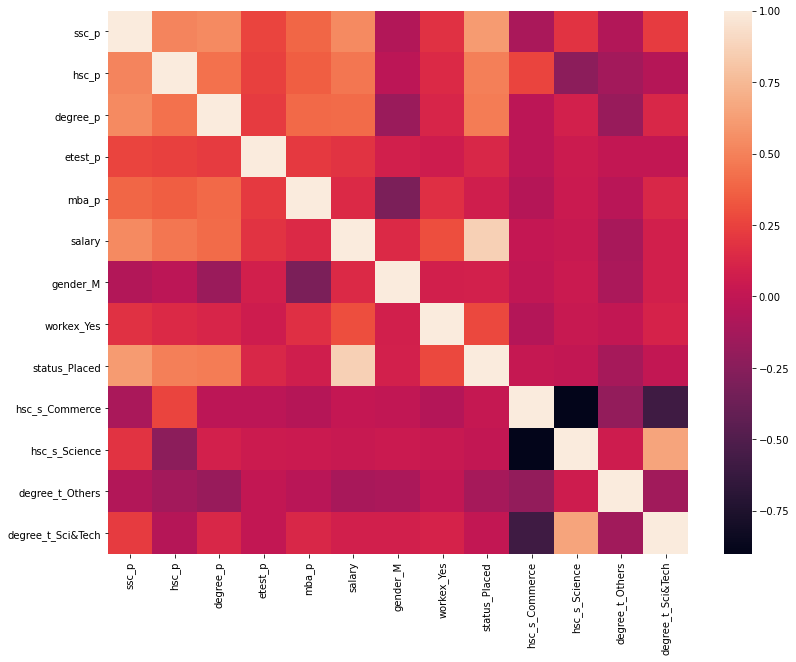

In [13]:
#Gives us a nice looking correlation heatmap.
#We are looking for high correlation specifically between our explanatory variables.

plt.figure(figsize=(13,10))
sns.heatmap(dummy.corr())

In [14]:
#We can see some slight correlation between some of our explanatory variables.

### Box Plots For Some Values

Text(0.5, 1.0, 'Employability percentage')

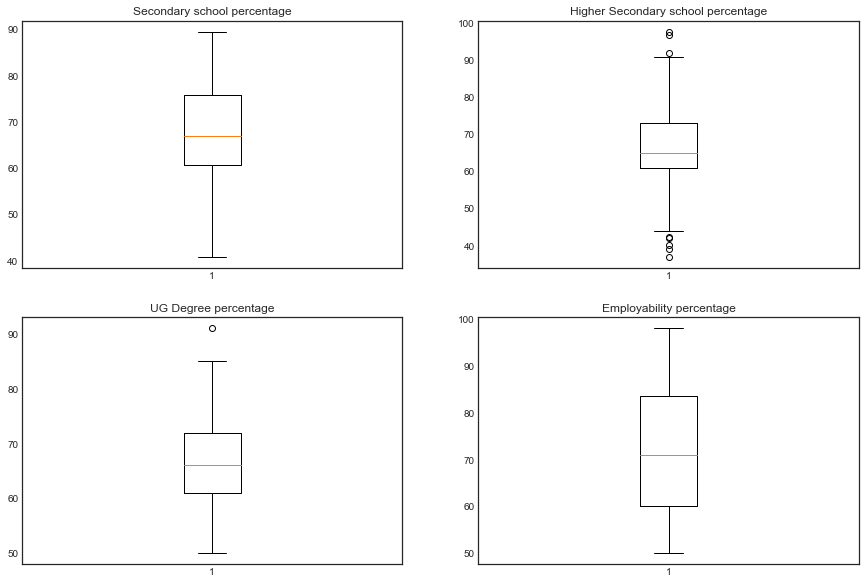

In [15]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')

ax=plt.subplot(221)
plt.boxplot(dummy['ssc_p'])
ax.set_title('Secondary school percentage')

ax=plt.subplot(222)
plt.boxplot(dummy['hsc_p'])
ax.set_title('Higher Secondary school percentage')

ax=plt.subplot(223)
plt.boxplot(dummy['degree_p'])
ax.set_title('UG Degree percentage')

ax=plt.subplot(224)
plt.boxplot(dummy['etest_p'])
ax.set_title('Employability percentage')

### Joint Plot For Salary Against Employability Score

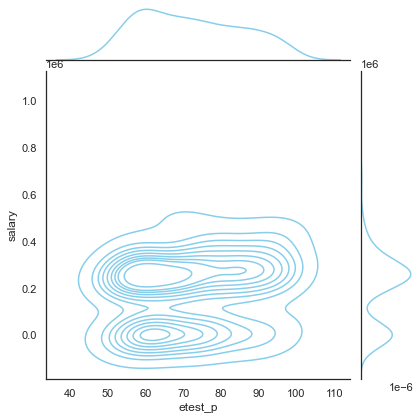

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=dummy["etest_p"], y=dummy["salary"], kind='kde', color="skyblue")

#      We get a nice heat map to see if employability score has any sort of effect on salary intake. There seems to be
#      two clusters, a small one nearer to a 0 salary and a bigger salary cluster at around 250,000.

### Pairplot With Placed and Not Placed Noted

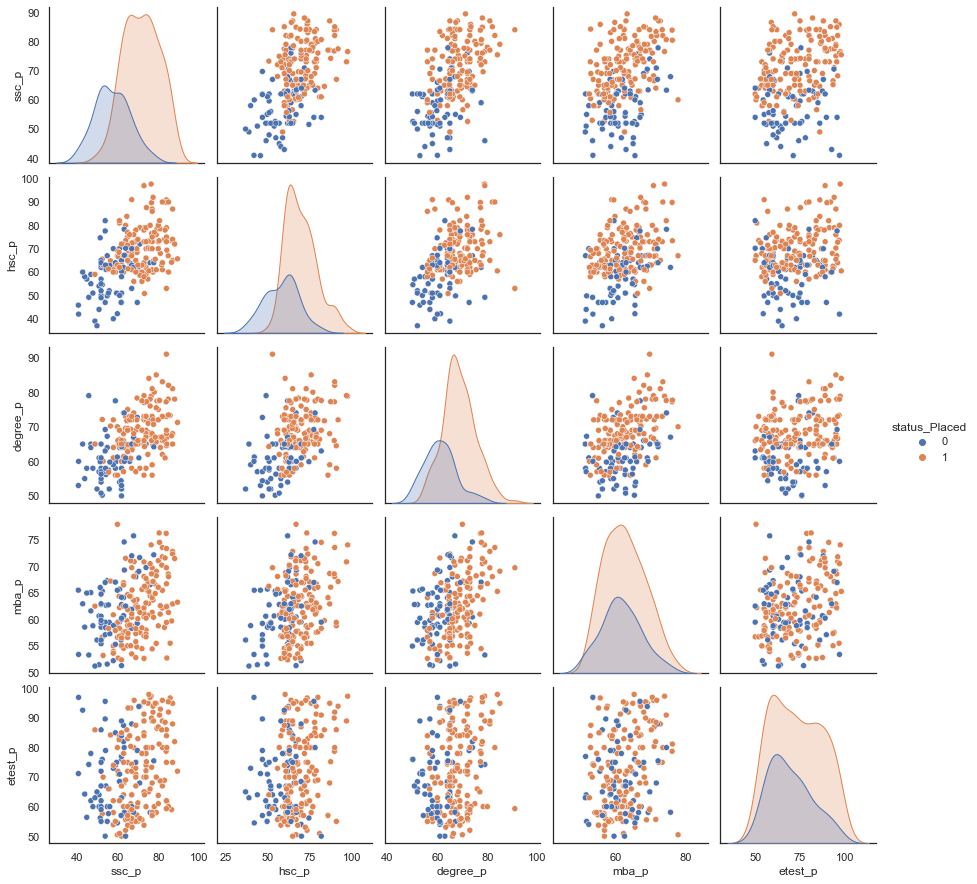

In [17]:
sns.pairplot(dummy,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status_Placed")

In [18]:
#In my opinon, a clearer story than the earlier heat map. I think the one that stands out to me most is the
#histogram in the middle. degree_p of placed students vs non placed students. You can see that the normal curve is shifted
#ever so slightly to the right. 

# RFC and Regression

In [19]:
#      Gives us all of our feature variables sans the placement dummy variable. We have to make sure we drop salary in order
#      to avoid any multicollinearity between getting placed in a job and obtaining a salary.

X = dummy.drop(['status_Placed', 'salary'], axis = 1)

#Then isolates our dependant variable.
y = dummy['status_Placed']





In [20]:
#Now we split our data into a train and a testing set using train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [21]:
#Lets scale our data to avoid issues with value weights, especially since we have a lot of dummy variables.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[ 1.49627155,  0.85343675,  0.44567533, -0.88608295,  0.12962291,
        -1.23669388,  1.43924583, -1.02353263,  1.29903811, -0.27386128,
         1.94365063],
       [ 1.92886643, -0.02403309,  0.74682835, -0.18448708,  0.29729901,
         0.80860754, -0.69480833, -1.02353263,  1.29903811, -0.27386128,
         1.94365063],
       [ 0.13439877,  0.47764667, -0.17938448, -0.74576378, -0.08238136,
         0.80860754,  1.43924583, -1.02353263,  1.29903811,  3.65148372,
        -0.51449576],
       [ 0.69516991,  0.66554171,  0.98105847,  0.37678961,  1.15687997,
        -1.23669388,  1.43924583,  0.97700842, -0.76980036, -0.27386128,
        -0.51449576],
       [-0.26615204, -0.08603845,  0.04413798, -1.72799799, -0.96123544,
         0.80860754, -0.69480833,  0.97700842, -0.76980036, -0.27386128,
        -0.51449576],
       [-1.62802482, -0.83761861, -1.02662829, -1.27967823,  0.6287966 ,
        -1.23669388,  1.43924583,  0.97700842, -0.76980036, -0.27386128,
        -0.514

### Random Forest Classifier

In [24]:
#Now we run our random forest classifier.

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

### Confusion Matrix and Report for RFC

In [25]:
#Lets see how well this model performed
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.86      0.93      0.89        27

    accuracy                           0.86        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.86      0.86      0.86        43

[[12  4]
 [ 2 25]]


In [26]:
#    What this means here is that we have a high probability of knowing who will not be offered a job with
#    our random forest model. But lets try a logistic regression and see if we can see what has a greater effect.

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver='lbfgs', max_iter=2000)
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [30]:
LogReg.score(X_test, y_test)

0.9069767441860465

In [31]:
#A 90% accuracy on predicting within the test portion of the data.

### Confusion Matrix and Report for Logistic Regression

In [32]:
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix) 
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[14  2]
 [ 2 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      0.93      0.93        27

    accuracy                           0.91        43
   macro avg       0.90      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



In [34]:
#     Our current Logistic Regression will predict correctly 90% of the time whether or not a person will get a job 
#     offer or not.